# Consistency of applying the formalism of caustic lensing using shear with two point mass lenses

The lens potential of a two point mass lens system is given as:
$$
\psi = \theta_m^2 \ln\sqrt{\theta_1^2 + \theta_2^2} + \theta_M^2 \ln\sqrt{\theta_1^2 + (\theta_2-R)^2}
$$
Assuming $\theta_1,\theta_2\ll R$, we can expand the lens potential to give something of form:
$$
\psi = \theta_m^2 \ln\sqrt{\theta_1^2 + \theta_2^2} + \theta_M^2 \ln(R) + \theta_M^2 \left(\frac{-\theta_2}{R}\right) + \frac{1}{2} \left(\frac{\theta_M}{R} \right)^2 \left(\theta_1^2 - \theta_2^2\right)
$$

However, according to Oguri (2017), the size of the critical curves (i.e. the angular size relavent during caustic crossing event) scale according to:
$$
\theta \sim \frac{\sqrt{|\mu_t|}}{8} \theta_m
$$
Here high tangential magnification is assumed. Furthermore, we know that the shear $\gamma$, according to the Taylor expansion above, is simply:

\begin{align*}
\kappa &= 0\\
\gamma &= \left(\frac{\theta_M}{R}\right)^2
\end{align*}

and the tangential magnification is given as:
$$
\mu_t^{-1} = 1 -\kappa - \gamma\\
\mu_r^{-1} = 1 -\kappa + \gamma
$$
Anyway, if we proceed and try to evaluate the consistency using the size of the critical curves, we will get:
\begin{align*}
\frac{\theta_m}{8\sqrt{1-\gamma}}\ll R
\end{align*}
Or 
$$
\frac{\theta_m/R}{8\sqrt{1-(\theta_M/R)^2}}\ll 1
$$
This is ok so long as $\theta_E$ is small enough. The magnification is tuned by $\theta_M/R$
<!--This might or might not be consistent depending on how you look at it. On the one hand if you have large magnification it seems like there are no way for the relations to hold because $\gamma\sim 1$ in that case but on the other hand if you keep the $\mu_t$ and arrange it the other way it seems like you can do it with $\theta_E/R\ll 1/\mu_t$. So here we will look at a numerical example to learn more about each cases.-->

Note that constraints in $\mu_t$ in turns give us constraints on the other quantities and ultimately the physical parameters. 

## Some scale analysis
Recall the Einstein radius $\theta_E$ is given by:

\begin{equation}
\theta_E = 2.854 \times 10^{-3} \text{ arcsec} \,\left(\frac{M}{M_\odot}\right)^{1/2} \left(\frac{D_L}{\text{1 kpc}}\right)^{-1/2}
\end{equation}

The Sgr A* is of $M \sim 4.31 \times 10^6 M_\odot$ and $D_L\sim 8.2 \text{kpc}$

In [6]:
def EinsteinRadius(M,DL):
    # Scales: M/M_sun, D/1kpc
    return 2.854e-3*(M**(1/2))*(DL**(-1/2)) # arcsec

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
M_sgr = 4.31e6 # M_sun
D_sgr = 8.2 # kpc

In [14]:
thetaE_sgr = EinsteinRadius(M_sgr,D_sgr) # arcsec
thetaE_sgr

2.0691199955772412

In [9]:
def arcsec2rad(theta):
    return (theta/3600)*np.pi/180

In [11]:
def kpc2au(dist):
    return dist*2.063e8 #au

In [18]:
dist = arcsec2rad(thetaE_sgr)*D_sgr # kpc
dist

8.225728990047823e-05

In [99]:
kpc2au(dist) # au

16969.678906468656

But what should we reference that to? We look at the Sgr A* cluster. The typical values appears to be from 0.2 arcsec to 4.0 arcsec. This gives the values of $\gamma$ to be:

In [86]:
eps=0.5
R = np.geomspace(thetaE_sgr-eps,thetaE_sgr+eps,1000)

In [87]:
gammas = (thetaE_sgr/R)**2
gammas[::100]

array([1.73883768, 1.57539886, 1.42732217, 1.29316368, 1.17161516,
       1.06149137, 0.96171846, 0.87132352, 0.78942508, 0.71522454])

This translate to magnification:

In [88]:
mu = (1-gammas)**(-1)
mu[::100]

array([ -1.35347727,  -1.73792489,  -2.34015473,  -3.4110638 ,
        -5.82699111, -16.26244523,  26.12225018,   7.77142793,
         4.7489037 ,   3.51153852])

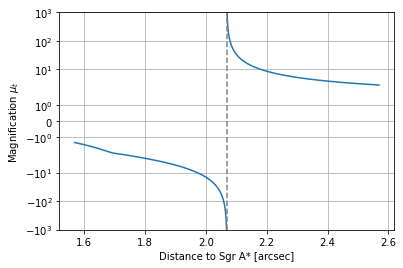

In [91]:
idc1 = np.where(R<thetaE_sgr)
idc2 = np.where(R>thetaE_sgr)
plt.plot(R[idc1],mu[idc1],color='tab:blue')
plt.plot(R[idc2],mu[idc2],color='tab:blue')
plt.ylim(-1000,1000)
plt.axvline(thetaE_sgr,ls='--',color='grey')
plt.grid()
plt.ylabel(r'Magnification $\mu_t$')
plt.xlabel(r'Distance to Sgr A* [arcsec]')
plt.yscale('symlog')
#plt.xscale('log')

As shown in the figure, the magnification changes rapidly with angular separation, so we need to ensure during the time scale of crossing the magnification does not change rapidly.

The bound above also give us an upper bound of microlens mass so that the result is consistent with the macro-microlens picture.
Suppose we have magnification (tangential) to be of order 1000, what will be the upper bound in microlens mass? Well, we do the consistency calculation:

\begin{align*}
\theta_m&\ll \frac{8R}{\sqrt{|\mu_t|}}\\
& = 0.505\text{ arcsec} \left(\frac{R}{\text{2''}}\right) \left(\frac{\mu_t}{1000}\right)^{-1/2}
\end{align*}

But for stars of $1-10 M_\odot$ and in Sgr A* distances the Einstein radius is of order of milliarcsecond. Therefore the approximation is justified.

In [100]:
8*2/np.sqrt(1000) # theta_m consistency bound

0.5059644256269407

In [101]:
EinsteinRadius(1,D_sgr),EinsteinRadius(10,D_sgr) # Probing the Einstein radius of stars orbiting Sgr A*

(0.0009966600320631882, 0.003151715754176121)